In [17]:
pip install matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/catch-the-pink-flamingo/catchThePinkFlamingo.csv


In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import pandas as pd

Côgn việc : Tiền xử lý dữ liệu (Data Preprocessing)
Đọc dữ liệu từ file (CSV/Excel Reader).

Kiểm tra thiếu dữ liệu (Missing Value, Column Filter).

Chuyển kiểu dữ liệu (String to Number, Number to String nếu cần).

Chuẩn hóa hoặc rút gọn cột không cần thiết.

Kết quả: Dữ liệu sạch, sẵn sàng để gán nhãn và train model.

Link mô tả file input : https://eagronin.github.io/capstone-acquire/

In [20]:
combined_data = pd.read_csv ('../input/catch-the-pink-flamingo/catchThePinkFlamingo.csv')
combined_data = combined_data.rename(columns=lambda x: x.strip())

In [21]:
# bỏ các dữ liệu thiếu vì k sử dụng được
combined_data = combined_data.dropna(subset=['count_buyId', 'avg_price'])  
combined_data

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0
...,...,...,...,...,...,...,...,...
4596,2052,35370,3,linux,119,14,1.0,1.0
4597,2316,35475,4,iphone,190,21,1.0,5.0
4614,1399,37261,6,mac,28,3,1.0,2.0
4615,248,37491,3,iphone,108,11,2.0,10.0


In [22]:
#combined_data.sort_values('userId')

# Phân tích dữ liệu

### Biểu đồ phân phối tần suất của Giá Trung Bình (avg_price).

array([[<Axes: title={'center': 'avg_price'}>]], dtype=object)

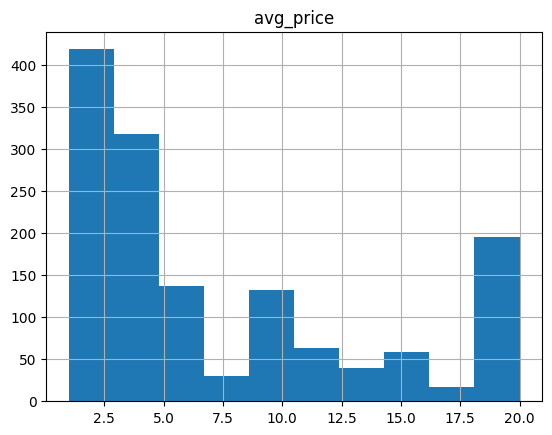

In [23]:
pd.DataFrame.hist(combined_data[['avg_price']])

Biểu đồ phân phối avg_price cho thấy hầu hết các phiên chơi có giá mua trung bình dưới 5 đô la, 
Tập trung đông nhất ở khoảng 1-2.5 đô la và 3-5 đô la tương ứng với nhóm "pennypinchers". 
Sau mốc 5 đô la, số lượng phiên giảm nhưng lại có một cụm đáng kể ở mức giá cao(khoảng 18-20 đô la) tương ứng với nhóm "highrollers". 
-> nhóm "pennypinchers" chiếm số đông hơn.


### Bảng tương quan giữa các chỉ số 

In [24]:
correlation_matrix= combined_data.drop('platformType',axis=1)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


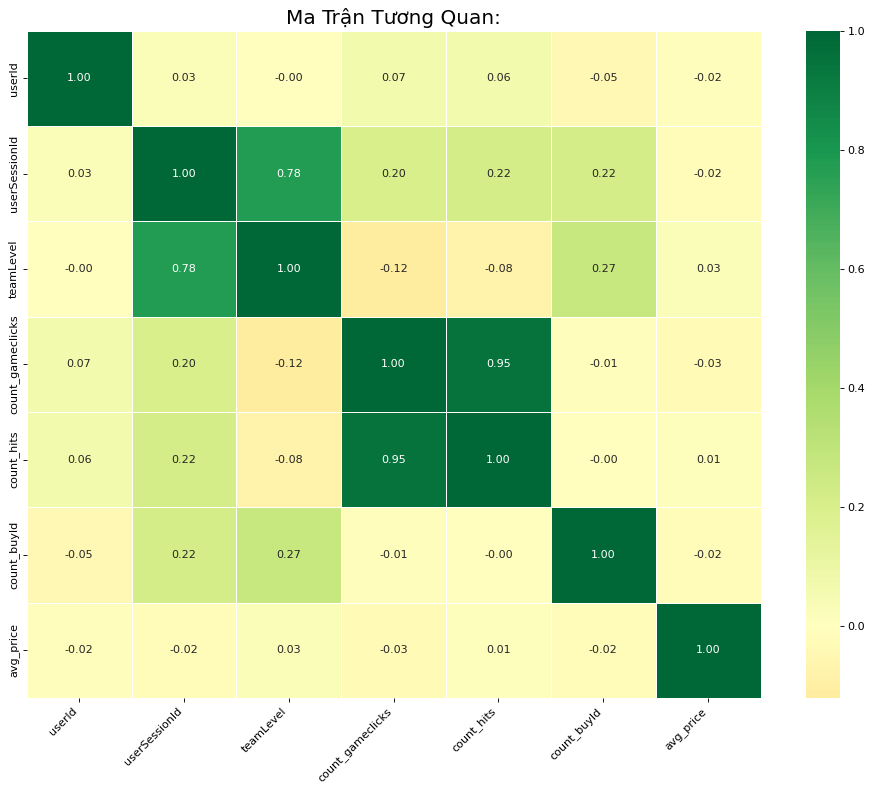

In [25]:
correlation_matrix = correlation_matrix.corr()

plt.figure(figsize=(12, 10), dpi=80) # Có thể cần tăng kích thước vì có thêm cột
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cmap='RdYlGn',
            center=0,
            annot=True,
            fmt=".2f",
            linewidths=.5)

# Decorations
plt.title('Ma Trận Tương Quan:', fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### bảng 

In [26]:
impute_grps = combined_data.pivot_table(values=["avg_price"], index=["platformType","count_gameclicks","count_hits"], aggfunc=len) # default aggfunc=np.mean
impute_grps

avg_price
platformType count_gameclicks count_hits           
android      12               1                   1
             16               3                   1
             18               2                   1
             19               2                   1
             22               1                   1
...                                             ...
windows      507              46                  1
             546              64                  1
             588              80                  1
             656              64                  1
             706              75                  1

[1286 rows x 1 columns]

### Khoảng giá trung bình mà người dùng tiêu ( theo thiết bị )

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


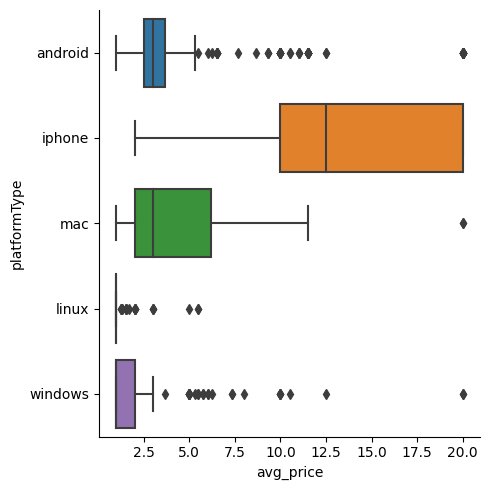

In [27]:
sns.catplot(x="avg_price",y="platformType",kind='box',data=combined_data)

## Gắn nhãn thủ công 

In [28]:
combined_data.replace("", np.nan, inplace=True)
combined_data = combined_data[np.isfinite(combined_data['count_buyId'])]
combined_data['user_category'] = np.where(combined_data['avg_price']> 5, 'HighRollers', 'PennyPinchers')
combined_data

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,user_category
4,937,5652,1,android,39,0,1.0,1.0,PennyPinchers
11,1623,5659,1,iphone,129,9,1.0,10.0,HighRollers
13,83,5661,1,android,102,14,1.0,5.0,PennyPinchers
17,121,5665,1,android,39,4,1.0,3.0,PennyPinchers
18,462,5666,1,android,90,10,1.0,3.0,PennyPinchers
...,...,...,...,...,...,...,...,...,...
4596,2052,35370,3,linux,119,14,1.0,1.0,PennyPinchers
4597,2316,35475,4,iphone,190,21,1.0,5.0,PennyPinchers
4614,1399,37261,6,mac,28,3,1.0,2.0,PennyPinchers
4615,248,37491,3,iphone,108,11,2.0,10.0,HighRollers


### Biểu đồ phân tán Số Lượt Click Trong Game theo Loại Nền Tảng và Phân Loại Người Dùng.

<Axes: xlabel='platformType', ylabel='count_gameclicks'>

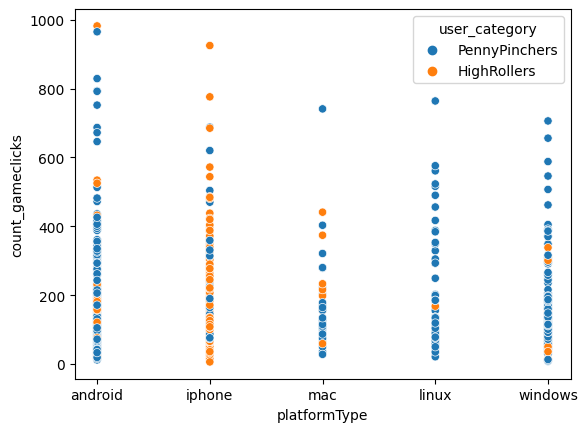

In [29]:
sns.scatterplot(x='platformType',y='count_gameclicks',hue='user_category',data=combined_data)

### Biểu đồ cột Số Lượng Người Dùng theo Loại Nền Tảng và Phân Loại Người Dùng.

<Axes: xlabel='platformType', ylabel='count'>

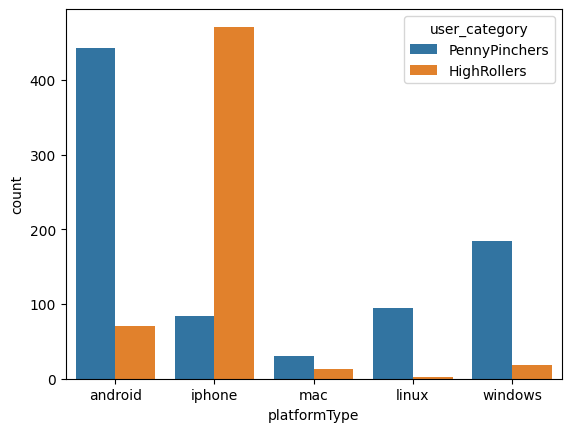

In [30]:
import seaborn as sns
sns.countplot(x="platformType", hue="user_category", data=combined_data)

### 

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


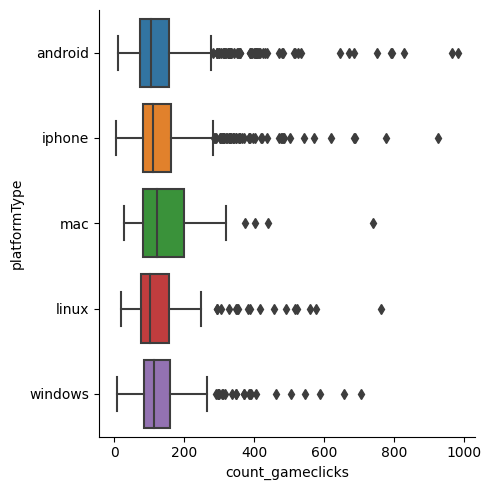

In [33]:
platform = combined_data.drop(['userId' , 'userSessionId' , 'avg_price'], axis = 1)
sns.catplot(x="count_gameclicks",y="platformType",kind='box',data=sub_data)